In [3]:
import pandas as pd
import numpy as np
import matplotlib as mtb
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("SampleSuperStore.csv")

In [5]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
data.shape

(9994, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
Segments = data['Segment'].unique()
print(Segments)

['Consumer' 'Corporate' 'Home Office']


In [10]:
Category= data['Category'].unique()
print(Category)

['Furniture' 'Office Supplies' 'Technology']


In [11]:
Ship_Mode = data['Ship Mode'].unique()
print(Ship_Mode)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [12]:
# 1. total number of orders and the total sales,profit generated.
Total_orders = data.shape[0]
Total_sales = round(data['Sales'].sum())
Total_profit = round(data['Profit'].sum())
print(f"The total number of orders - {Total_orders}")
print(f"The total sales generated - {Total_sales}")
print(f"The total profit generated - {Total_profit}")

The total number of orders - 9994
The total sales generated - 2297201
The total profit generated - 286397


In [13]:
# 2.Avg Discount given on the orders
Avg_discount = round(data['Discount'].mean(),2)
print(f'Average discount - {Avg_discount}')

Average discount - 0.16


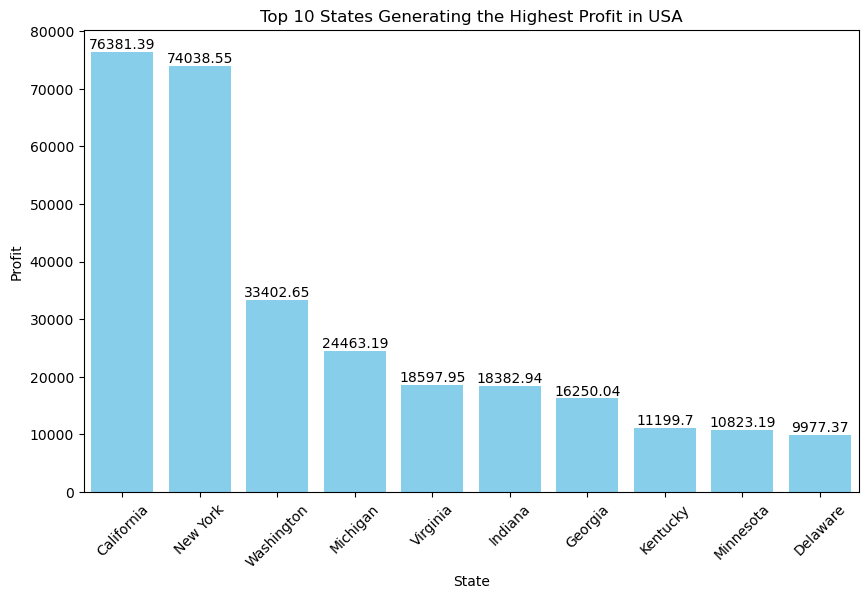

In [59]:
# 3.Top 10 states generating the highest profit in USA
profit_distribution = data.groupby('State')['Profit'].sum()
top_10_states = profit_distribution.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_10_states.plot(kind='bar')
bars = plt.bar(top_10_states.index, top_10_states.values, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
plt.title("Top 10 States Generating the Highest Profit in USA")
plt.xlabel("State")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()

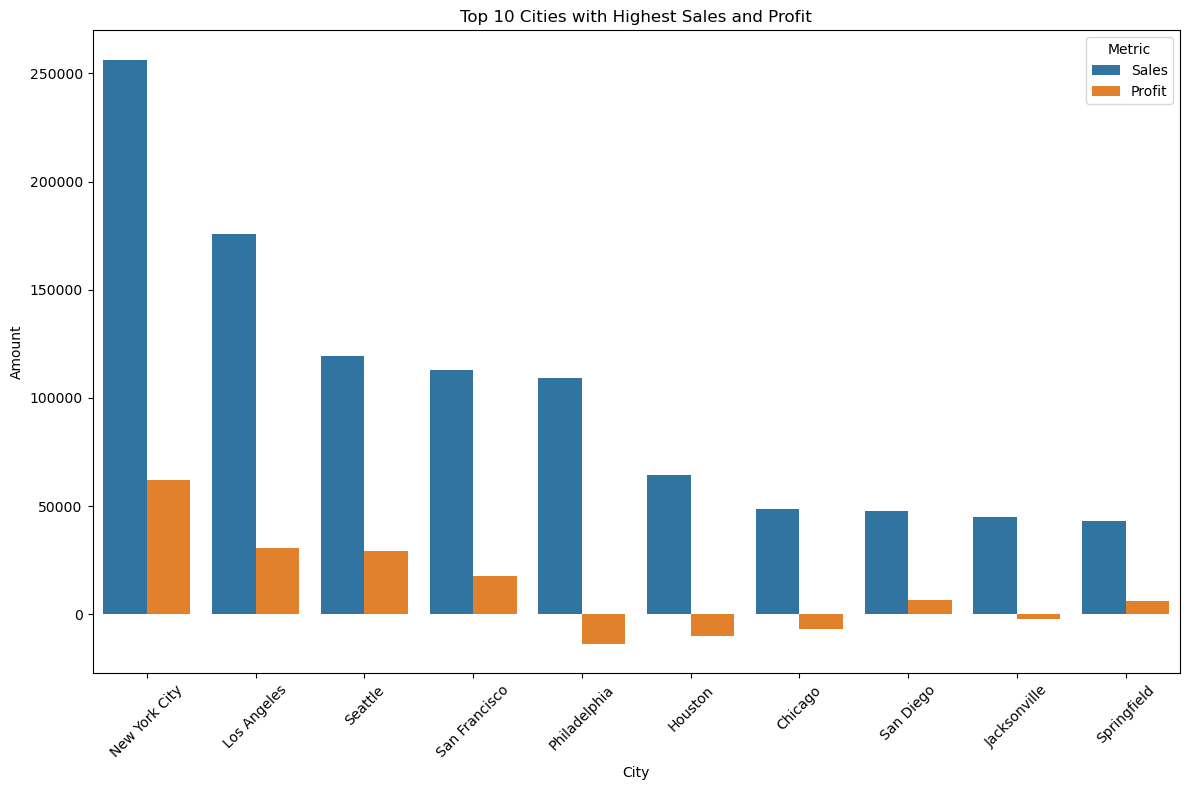

In [78]:
# 3.Top 10 cities with the highest sales in USA and the profit they are generating
top_10_cities = data.groupby('City')[['Sales', 'Profit']].sum().nlargest(10, 'Sales')
top_10_cities = top_10_cities.reset_index().melt(id_vars=['City'], var_name='Metric', value_name='Amount')

plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_cities, x='City', y='Amount', hue='Metric')
plt.xlabel('City')
plt.ylabel('Amount')
plt.title('Top 10 Cities with Highest Sales and Profit')
plt.legend(title='Metric', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

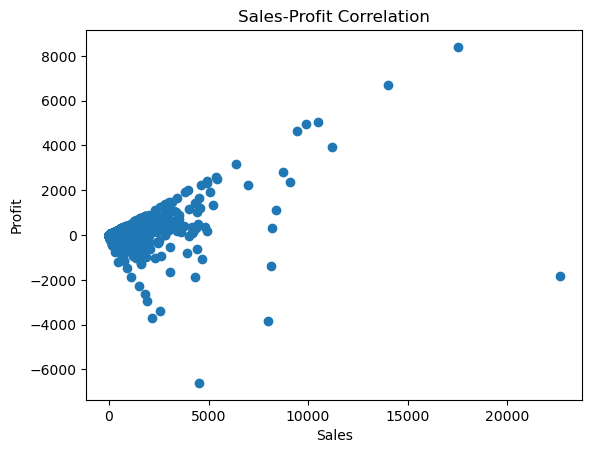

In [15]:
# 5.Correlation between Sales and Profit 
plt.scatter(data['Sales'],data['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales-Profit Correlation')
plt.show()

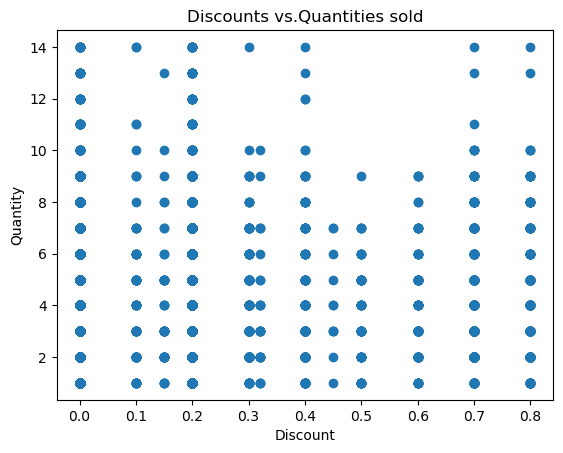

In [16]:
# 6.Correlation between discounts offered and Quantities sold
plt.scatter(data['Discount'],data['Quantity'])
plt.title('Discounts vs.Quantities sold')
plt.xlabel('Discount')
plt.ylabel('Quantity')
plt.show()

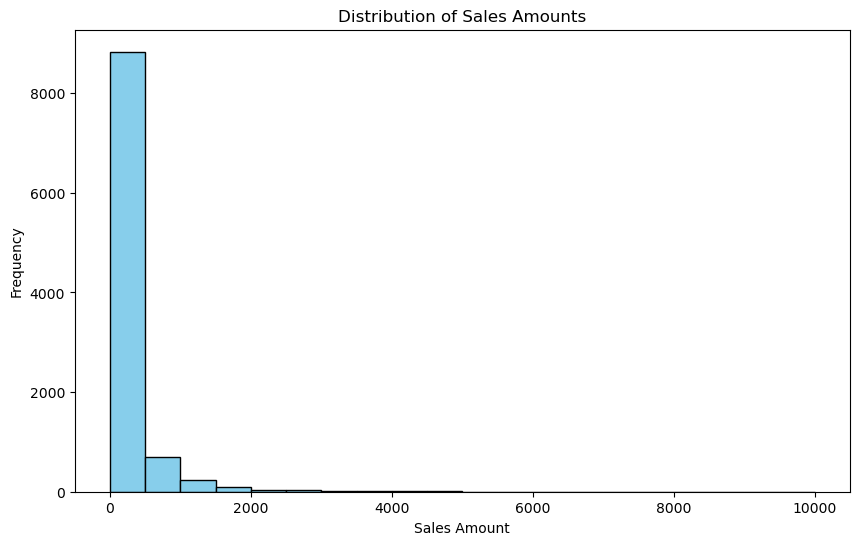

In [17]:
# 7.Distribution of sales amounts
sales_distribution = data['Sales']
plt.figure(figsize=(10, 6))
plt.hist(sales_distribution, bins=20, range=(0, 10000), color='skyblue', edgecolor='black')
plt.title('Distribution of Sales Amounts')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

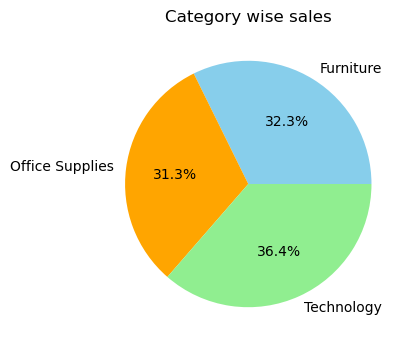

In [18]:
# 8.Category wise sales
categories = data.groupby("Category")["Sales"].sum()
plt.figure(figsize = (4,4))
plt.pie(categories,labels = categories.index,autopct='%1.1f%%',colors=['skyblue', 'orange', 'lightgreen'])
plt.title("Category wise sales")
plt.show()

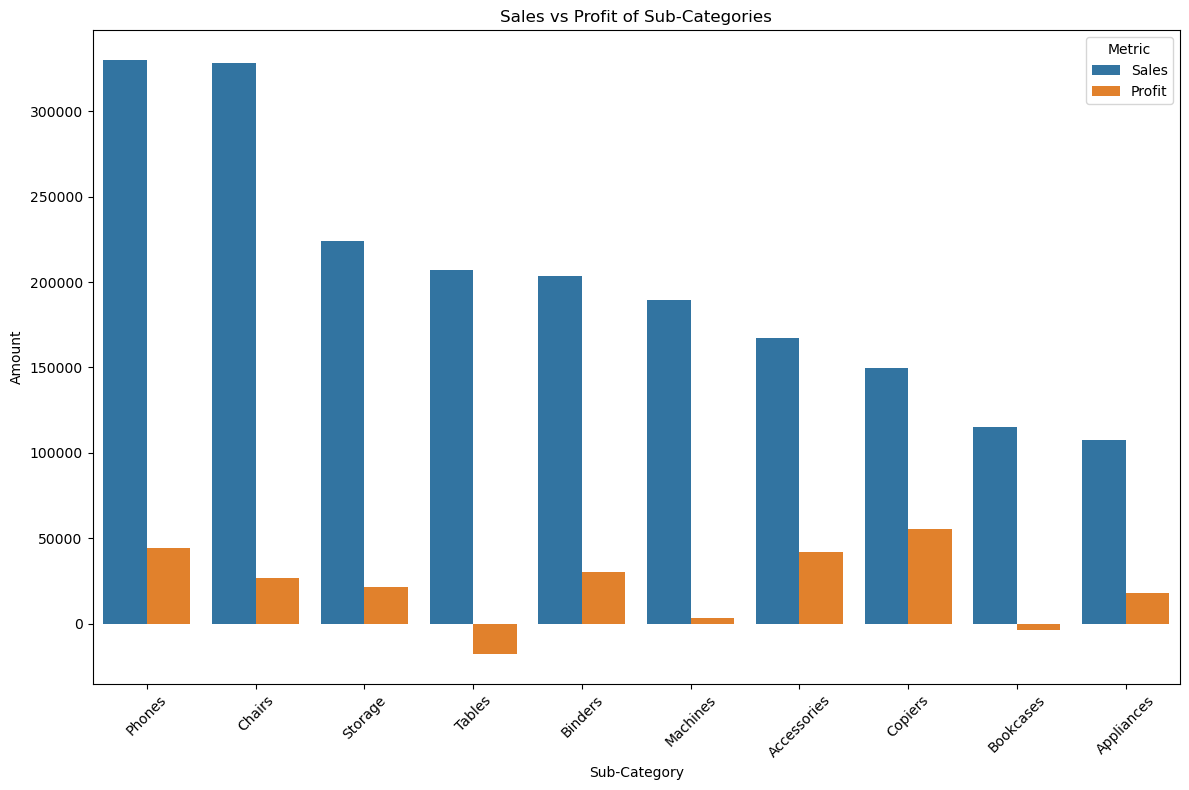

In [77]:
# 9. Sales and Profit of all the sub-categories
subcategories = data.groupby('Sub-Category')[['Sales', 'Profit']].sum().nlargest(10, 'Sales')
subcategories = subcategories.reset_index().melt(id_vars=['Sub-Category'], var_name='Metric', value_name='Amount')

plt.figure(figsize=(12, 8))
sns.barplot(data=subcategories, x='Sub-Category', y='Amount', hue='Metric')
plt.xlabel('Sub-Category')
plt.ylabel('Amount')
plt.title('Sales vs Profit of Sub-Categories')
plt.legend(title='Metric', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

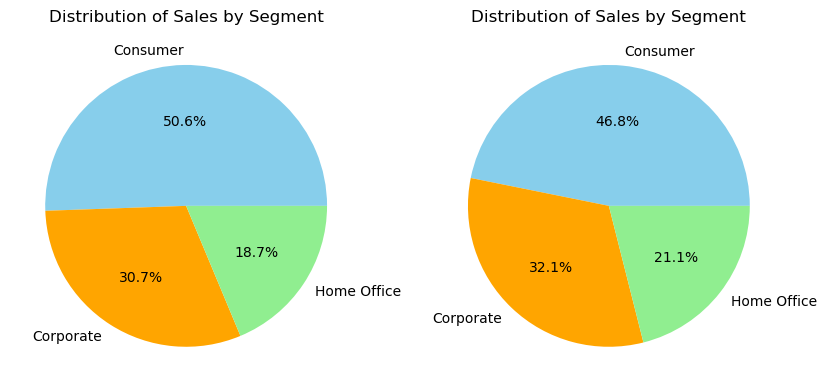

In [51]:
# 10.Customer Segmentation
segments_sales = data.groupby("Segment")["Sales"].sum()
segments_profit = data.groupby("Segment")["Profit"].sum()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].pie(segments_sales, labels=segments_sales.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen'])
axes[0].set_title('Distribution of Sales by Segment')

axes[1].pie(segments_profit, labels=segments_profit.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen'])
axes[1].set_title('Distribution of Profit by Segment')

plt.title('Distribution of Sales by Segment')
plt.show()

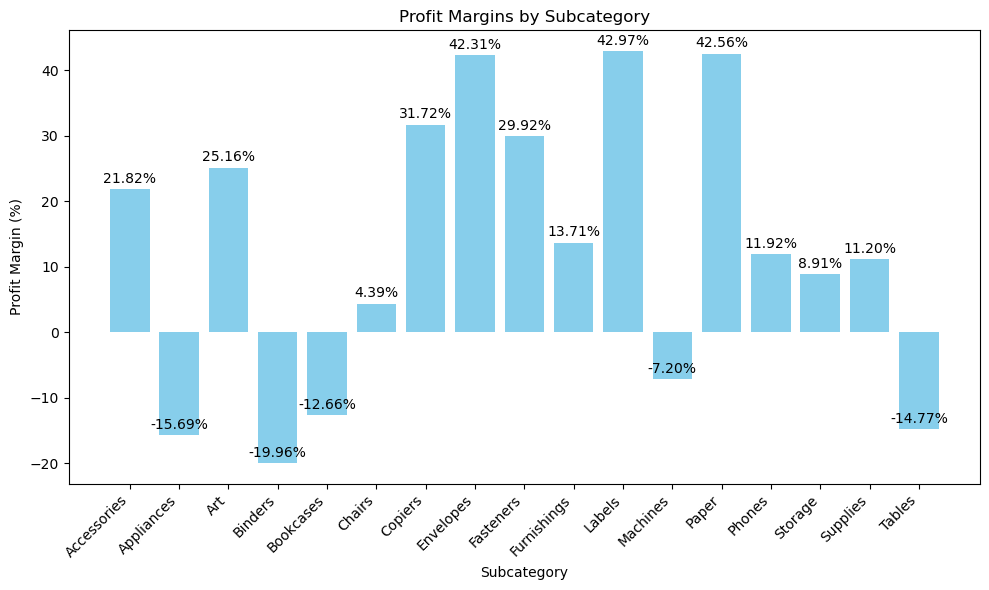

In [49]:
# 11. Profit Margin of the sub-categories
data["Profit Margin"] = round((data['Profit']/data['Sales'])*100,2)
subcategories = data['Sub-Category']
profit_margins = round(data.groupby("Sub-Category")["Profit Margin"].mean(),2)
profit_margins
plt.figure(figsize=(10,6))

bars = plt.bar(profit_margins.index,profit_margins.values, color='skyblue')
for bar, margin in zip(bars, profit_margins):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{margin:.2f}%', ha='center', va='bottom')

plt.title('Profit Margins by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


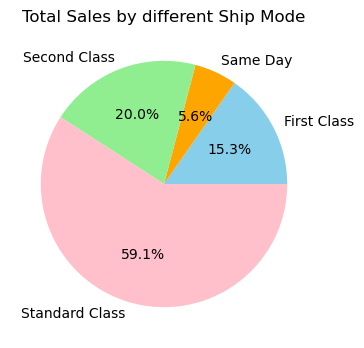

In [84]:
# 12. Sales by ship mode
shipmode = data.groupby("Ship Mode")["Sales"].sum()
plt.figure(figsize = (4,4))
plt.pie(shipmode,labels = shipmode.index,autopct='%1.1f%%',colors=['skyblue', 'orange', 'lightgreen',"pink"])
plt.title("Total Sales by different Ship Mode")
plt.show()

<Axes: >

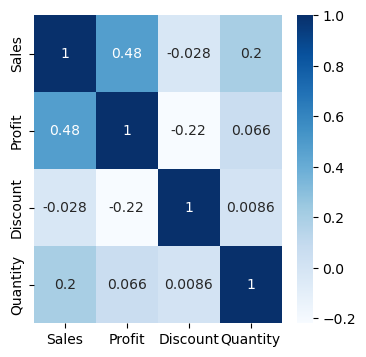

In [10]:
# 13. Correlation between sales,profit,discount,qty
data1 = data[["Sales","Profit","Discount","Quantity"]]
plt.figure(figsize =(4,4))
corr = data1.corr()
sns.heatmap(corr,annot=True,cmap='Blues')